# Bardziej zaawansowane wizualizacje danych

`seaborn` pozwala tworzyć rozmaite bardziej złożone typy wykresów. Nie damy rady omówić na zajęciach wszystkich możliwości, jakie daje ta biblioteka, dlatego skoncentrujemy się na kilku wybranych.

In [2]:
import pandas as pd
import seaborn as sns

## `jointplot`

`jointplot` z pakietu `seaborn` jest funkcją, która pozwala nam stworzyć ilustrację rozkładu dwóch zmiennych, która zarazem zawiera dwuwymiarowy wykres jak i dwa jednowymiarowe wykresy dla każdej zmiennej z osobna. Kombinuje ona więc jednocześnie:
+ wykres punktowy (*scatterplot*)
+ histogramy 
+ wykres gęstości prawdopodobieństwa estymowanej za pomocą jądrowego estymatora gęstości

Jest to jeden z najfajniejszych wykresów, jeśli chcemy zilustrować kilka właśności dwóch zmiennych jednocześnie. W tym przykładzie ponownie posłużymy się danymi zeksperymencie o ryzyku epistemicznym.

In [3]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/risk.csv')
data.head()

,Unnamed: 0,age,rating,participant
0,0,30.0,6.0,1
1,1,11.0,4.0,2
2,2,21.0,3.0,3
3,3,41.0,8.0,4
4,4,15.0,3.0,5


`jointplot` przyjmuje dużo opcjonalnych argumentów. Warto je przejrzeć w dokumentacji. Dodatkowo należy pamiętać, że wszystkie składowe wykresy możemy modyfikować, przekazując argumenty do rysujących je funkcji jako słowniki w `joint_kws`, `hist_kws` i tak dalej. `seaborn` sam wie jak rozpakować te argumenty.

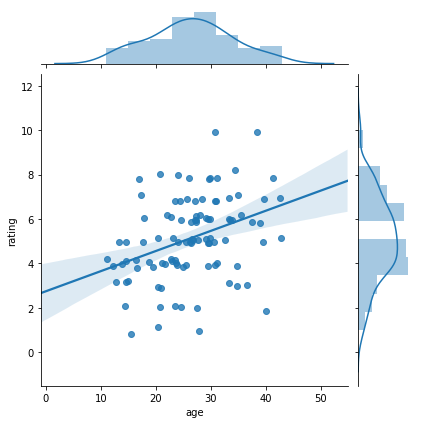

In [6]:
sns.jointplot('age', 'rating',
              kind = 'reg', # inne możliwości: 'scatter', 'resid', 'kde', 'hex', proszę spróbować!
              joint_kws = {'x_jitter' : 0.6, 'y_jitter' : 0.2}, # możemy przekazywać argumenty do wykresów składowych
              data = data);

## Mapa cieplna (`heatmap`)

## Wielopanelowe wykresy

Czasami (w semantyce eksperymentalnej BARDZO często) jest tak, że mamy jakąś jedną zmienną zależną (np. czas reakcji albo ocena akceptowalności jakiegoś zdania) i dużo zmiennych niezależnych (warunki eksperymentalne). Wtedy moglibyśmy chcieć przedsatawić nasze dane na jednym wykresie w taki sposób, aby móc łatwo porównywać jakieś zagregowane wartości (np. średnie) między warunkami eksperymentalnymi. Najprostszym (i bardzo dobrym!) sposobem jest wykorzystanie funkcji `catplot` z biblioteki `seaborn`, która pozwala łątwo tworzyć wielopanelowe wykresy. Wczytajmy więc znów dane dotyczące dwujęzycznego eksperymentu Stroopa, tym razem jednak z danymi dotyczącymi płci.

In [7]:
data = pd.read_csv('bi-stroop_sex.csv')
data.head()

,participant,condition,rt,lang,sex
0,1,congruent,192.789792,pol,K
1,1,incongruent,338.384685,pol,K
2,1,congruent,129.859529,pol,K
3,1,incongruent,321.185086,pol,K
4,1,incongruent,485.135614,pol,K


Chcielibyśmy stworzyć wykres, który będzie ilustrował średni czas reakcji dla obu warunków eksperymentalnych, na wykresie chcielibyśmy jednak zawrzeć dwa dodatkowe podziały - na uczestników płci męskiej i żeńskiej oraz na język angielski i polski. W tym celu posłużymy się funkcją `catplot`.

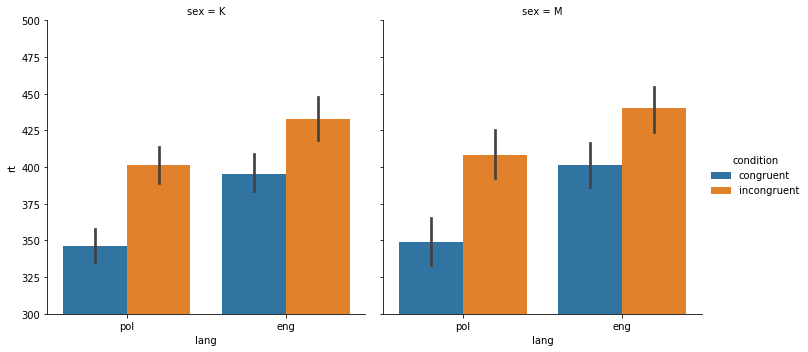

In [12]:
g = sns.catplot(x = 'lang',
             y = 'rt', 
             hue = 'condition', 
             col = 'sex', # gdybyśmy mieli jeszcze jedną zmienną, to moglibyśmy podać dodatkowo argument 'row'
            kind = 'bar', # proszę przetestować inne możliwości
           data = data);
g.set(ylim = (300,500)); # gdybyśmy chcieli zmienić granice wykresu (bo np. jest mało informatywny z "0" jako dołem)

Oczywiście funkcji `catplot` nie trzeba stosować tylko dla wykresów słupkowych. Poniżej znajdują się dodatkowe dwa przykłady - jeden z wykresem skrzypcowym (`violin`), drugi z pewną wariacją na temat wykresu punktowego (`strip`).

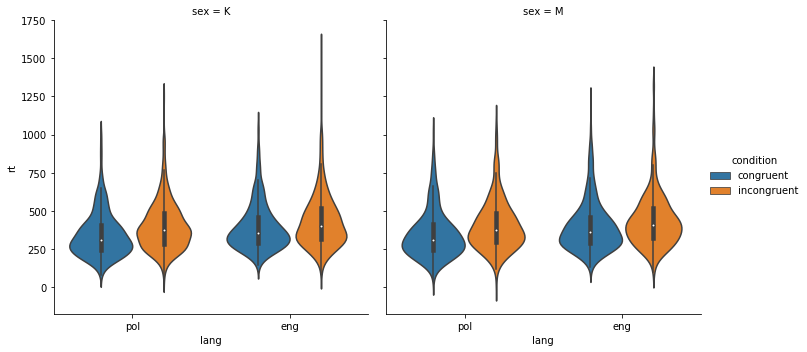

In [16]:
sns.catplot(x = 'lang',
             y = 'rt', 
             hue = 'condition', 
             col = 'sex',
            kind = 'violin',
           data = data);

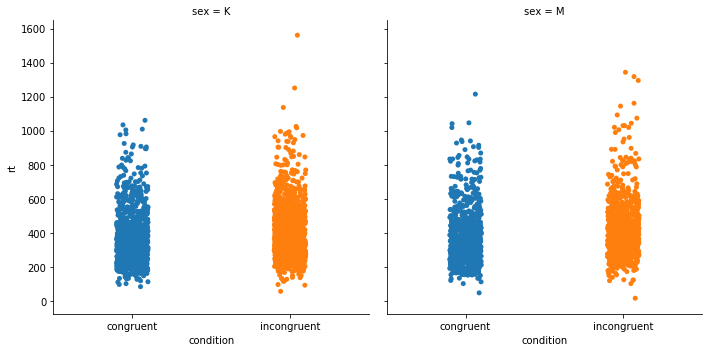

In [17]:
sns.catplot(x = 'condition',
             y = 'rt', 
             hue = 'condition', 
             col = 'sex',
             kind = 'strip',
            data = data);

Warto przejrzeć dokumentacje funkcji `catplot`, ponieważ oczywiście pozwala ona na dostosowanie wykresów składowych (mechanizm z `_kws`). Podstawową `seaborn` jest jednak to, że bez specjalnego dostosowywania pozwala stworzyć nadające się do publikacji, bardzo ładne wykresy!